# Uniform Distribution

#[1] PDF Calculation for theta given data

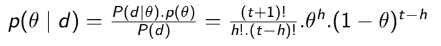

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def pdf(h,t,theta): # Refer Image [1] for the reference. This function calculate the pdf for theta given the data
    return(np.math.factorial(t+1)/(np.math.factorial(h)*np.math.factorial(t-h))*(theta**h)*((1-theta)**h)) 
    # here 'h' represents students opting for horizontal grouping
    # theta is the prior
    # 't' is number of students opting for verticle grouping

    
def update(theta,theta_n,s_belief): #theta = prior, theta_n = 1- prior, s_belief = Students belief who havent participated in the event till now
  # This function returns the updated belief for remaining participants
    
    ind_prob = []
    for i in range(len(s_belief)):
        ind_prob.append(s_belief[i][0])
        # appending Independent probabilites of the students remaining to put their choices p(h/ t) and p(h/t not)
        ind_prob.append(s_belief[i][1]*theta+s_belief[i][1]*theta_n) # ind_prob = Independent probabilites of the students remaining to put their choices. Update method is used as shown in the edpuzzle
        ind_prob.append(1 - s_belief[i][1]*theta+s_belief[i][1]*theta_n)  
    return(ind_prob) #returning the individual probability
        

def compute(theta, s_belief):
  # Definition Calculating new theta and beliefs 
    
    theta_n = 1-theta
    prob_list = [] # list to append P(h) or P(h not) i.e. 
    new_theta = [] # Updated theta using formula as showing in image using formula |
    # P(theta) = P(students opting horizontal grouping given ) 
    
  
    h_count = 0 # count keeping track on student opting for horizontal grouping 
    v_count = 0 # count keeping track on student opting for vertical grouping 

    for i in range(len(s_belief)):
        candidate_decision = s_belief[i][0]
        if candidate_decision == 'v': # case to check if student opted for verticle grouping or horizontal grouping
            v_count+=1
            #for every notation, if variable is ended with v, it means its for verticle and if '_n' is present, it means 'not' 
            prob_v_given_theta = s_belief[i][1]  #s_beleif is the students belief list which include P(h/t) value and P(h/t not) value which are coming from the main function, generated randomly and are updated after every student choosing the grouping
            prob_v_given_theta_n = s_belief[i][2]            
            prob_theta_given_v = prob_v_given_theta*theta #P(not horizontal grouping selected by students given theta), similar to P(h/theta)
            prob_theta_n_given_v = prob_v_given_theta_n*theta_n #P(h/theta not)
            prob_new_theta = prob_theta_given_v/(prob_theta_given_v+prob_theta_n_given_v) # New theta method i.e. theta update is done as shown in the edpuzzel. formula theta = P(theta/not horizontal grouping selected by students given theta)/(P(not horizontal grouping selected by students given theta)+(theta/not horizontal grouping selected by students given theta))
            prob_new_theta_n = prob_theta_n_given_v/(prob_theta_given_v+prob_theta_n_given_v)
            new_theta.append(prob_new_theta) #appending new theta values 
            new_theta.append(prob_new_theta_n)
            ind_prob = update(prob_new_theta,prob_new_theta_n,s_belief[i:])    #calling function update to fetch new updated individual beliefs
            prob_h = prob_v_given_theta*theta + prob_v_given_theta_n*theta_n #P(h) = P(v/theta)*theta+P(v/theta_n)*theta_n (Similar approach done in edpuzzle)
            prob_list.append(prob_h) # appending the probability
            prob_list.append(1-prob_h)
            
            
        elif candidate_decision =='h': #this is for the case when the student selects hrizontal grouping (Rest explaination is same)
            h_count+=1
            prob_h_given_theta = s_belief[i][1]
            prob_h_given_theta_n = s_belief[i][2]
            prob_theta_given_h = prob_h_given_theta*theta
            prob_theta_n_given_h = prob_h_given_theta_n*theta_n
            prob_new_theta = prob_theta_given_h/(prob_theta_given_h+prob_theta_n_given_h)
            prob_new_theta_n = prob_theta_n_given_h/(prob_theta_given_h+prob_theta_n_given_h)
            new_theta.append(prob_new_theta)
            new_theta.append(prob_new_theta_n)
            ind_prob = update(prob_new_theta,prob_new_theta_n,s_belief[i:])
            prob_h = prob_h_given_theta*theta + prob_h_given_theta_n*theta_n
            prob_list.append(prob_h)
            prob_list.append(1-prob_h)
            
    
    return(ind_prob,new_theta,h_count,v_count,np.array(prob_list).reshape((-1,2))) #this function returns individual belerticle countiefs of the students. posterior(New theta), No. of students opting for horizontal grouping, No. of students opting for vertical grouping and the P(h/t) likelihood for every student



theta = list(np.random.uniform(0,1,100))

bel_ind = [] #beliefs individuals given theta (for both theta is true and false)
    
b_1 = ['v']*17 # this generates 'v' character 17 times
b_2 = ['h']*10 # this generates 'h' character 10 times 
for i in range(10):
    b_1.append(b_2[i]) combining both lists 

belief_f = b_1 #assigning it to belief variable 

belief_val_theta = [] # list to add the randomly generated beleif value theta
belief_val_theta_n = []
for i in range(27):
    belief_val_theta.append(np.round(random.uniform(0.1, 1),4)) # value randomly generated between 0.1 and 1, for P(h/t)
    belief_val_theta_n.append(np.round(random.uniform(0.1, 1),4)) # value randomly generated between 0.1 and 1, for P(h/t not) ++> All these are likelihoods
s_belief = list((zip(belief_f,belief_val_theta,belief_val_theta_n))) 
random.shuffle(s_belief) # Shuffling the values 
theta = list(np.random.uniform(0,1,100)) # generating theta values which follows the uniform distribution, if we plot histogram of this, we would get 1 as area under the curve
print('Likelihood:\n{}'.format(s_belief))

expected_val_theta = []
prob_dist_theta = []
theta_output = []
for i in range(len(theta)):
    
    ind_prob,new_theta,h,v,updated_beliefs = compute(theta[i],s_belief) #calling compute function as explained above
    new_theta = np.array(new_theta).reshape((-1,2))[-1][0] # reshaping the new_theta to numpy array
    theta_output.append(new_theta) # appending final updated theta value  to the output list
    expected_val_theta.append((h+1)/(h+v+2)) # Calculating the updated value of theta using formula (h+1)/(h+v+2) as given in the presentation
    prob_dist_theta.append(pdf(h,v+h,theta[i])) #calling pdf function to calculate pdf for every value of theta, no. of students opting for horizontal grouping and number of people opting for verticle grouping
    #printing all the values which we have calculated
    print('\n=======================For theta {}======================\n'.format(theta[i])) 
    print('Updated Other students beliefs as a result of previous decisions:\n Format => belief P(H|theta) P(H|not theta)\n{}'.format(ind_prob))
    print('\nTheta {}:{}\n'.format(i,np.round(theta[i],4)))
    print('\npdf(theta):\n{}'.format(prob_dist_theta[-1]))
    print('\nExpected Theta:\n{}'.format(expected_val_theta[-1]))
    print('\nNew Theta:\n[{}]'.format(new_theta))
    print('\nOdds : {}\n'.format(new_theta/(1-new_theta)))
    print('\nUpdated Beliefs:\nProb of horizonal Allignment ||\tProb of Vertical Allignment\n\n{}'.format(updated_beliefs))   


Likelihood:
[('h', 0.2405, 0.861), ('v', 0.4562, 0.5385), ('v', 0.5283, 0.6087), ('v', 0.2502, 0.1947), ('h', 0.1691, 0.9867), ('v', 0.225, 0.7547), ('h', 0.5552, 0.8216), ('h', 0.8605, 0.4839), ('v', 0.4295, 0.3957), ('h', 0.5463, 0.4669), ('v', 0.6729, 0.4956), ('h', 0.107, 0.381), ('v', 0.4623, 0.7895), ('v', 0.4578, 0.5446), ('v', 0.652, 0.452), ('h', 0.4165, 0.6699), ('v', 0.3679, 0.7617), ('h', 0.429, 0.8773), ('h', 0.4106, 0.6291), ('v', 0.3932, 0.2059), ('v', 0.1393, 0.2501), ('v', 0.3568, 0.445), ('v', 0.6954, 0.698), ('v', 0.5119, 0.8959), ('v', 0.574, 0.6545), ('v', 0.482, 0.1553), ('h', 0.9985, 0.8505)]

=======================For theta 0.7268243827220751======================

Updated Other students beliefs as a result of previous decisions:
 Format => belief P(H|theta) P(H|not theta)
['h', 0.9985, 0.48578059872106716]

Theta 0:0.7268


pdf(theta):
22.491762372170633

Expected Theta:
0.3793103448275862

New Theta:
[0.7574959445563009]

Odds : 3.123642378558756


Updated Be


Posteriori Distribution Mean:
64.8003419731556

Posteriori Distribution Standard Deviation:
77.77663793455619


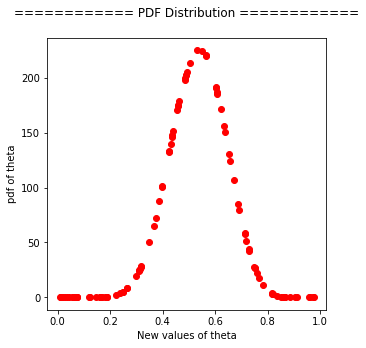

In [ ]:
plt.figure(figsize = (5,5))  
plt.ylabel('pdf of theta')
plt.xlabel('New values of theta')
plt.title('============ PDF Distribution ============\n')
plt.scatter(theta_output, prob_dist_theta, c ="red") 

print('\nPosteriori Distribution Mean:\n{}'.format(np.mean(prob_dist_theta)))
print('\nPosteriori Distribution Standard Deviation:\n{}'.format(np.std(prob_dist_theta))) #Scatter plot for pdf(theta) vs. new theta calculated

# For Normal Distribution

### The complete process goes same for normal distribution except the theta generation, it is generated in such a way the if pdf is plotted, it can be observed that it will follow normal distribution


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def pdf(h,t,theta):
    return(np.math.factorial(t+1)/(np.math.factorial(h)*np.math.factorial(t-h))*(theta**h)*((1-theta)**h))
    
def update(theta,theta_n,s_belief):
    
    ind_prob = []
    for i in range(len(s_belief)):
        ind_prob.append(s_belief[i][0])
        ind_prob.append(s_belief[i][1]*theta+s_belief[i][1]*theta_n)
        ind_prob.append(1 - s_belief[i][1]*theta+s_belief[i][1]*theta_n)  
    return(ind_prob)
        

def compute(theta, s_belief):
    
    theta_n = 1-theta
    prob_list = []
    new_theta = []
    ind_prob = []
    h_count = 0
    v_count = 0

    for i in range(len(s_belief)):
        candidate_decision = s_belief[i][0]
        if candidate_decision == 'v':
            v_count+=1
            prob_v_given_theta = s_belief[i][1]
            prob_v_given_theta_n = s_belief[i][2]            
            prob_theta_given_v = prob_v_given_theta*theta
            prob_theta_n_given_v = prob_v_given_theta_n*theta_n
            prob_new_theta = prob_theta_given_v/(prob_theta_given_v+prob_theta_n_given_v)
            prob_new_theta_n = prob_theta_n_given_v/(prob_theta_given_v+prob_theta_n_given_v)
            new_theta.append(prob_new_theta)
            new_theta.append(prob_new_theta_n)
            ind_prob = update(prob_new_theta,prob_new_theta_n,s_belief[i:])   
            prob_h = prob_v_given_theta*theta + prob_v_given_theta_n*theta_n
            prob_list.append(prob_h)
            prob_list.append(1-prob_h)
            
            
        elif candidate_decision =='h':
            h_count+=1
            prob_h_given_theta = s_belief[i][1]
            prob_h_given_theta_n = s_belief[i][2]
            prob_theta_given_h = prob_h_given_theta*theta
            prob_theta_n_given_h = prob_h_given_theta_n*theta_n
            prob_new_theta = prob_theta_given_h/(prob_theta_given_h+prob_theta_n_given_h)
            prob_new_theta_n = prob_theta_n_given_h/(prob_theta_given_h+prob_theta_n_given_h)
            new_theta.append(prob_new_theta)
            new_theta.append(prob_new_theta_n)
            ind_prob = update(prob_new_theta,prob_new_theta_n,s_belief[i:])
            prob_h = prob_h_given_theta*theta + prob_h_given_theta_n*theta_n
            prob_list.append(prob_h)
            prob_list.append(1-prob_h)
            
    
    return(ind_prob,new_theta,h_count,v_count,np.array(prob_list).reshape((-1,2)))



theta = list(np.random.normal(0,1,100))

bel_ind = [] #beliefs individuals given theta (for both theta is true and false)
    
b_1 = ['v']*17
b_2 = ['h']*10
for i in range(10):
    b_1.append(b_2[i])

belief_f = b_1

belief_val_theta = []
belief_val_theta_n = []
for i in range(27):
    belief_val_theta.append(np.round(random.uniform(0.1, 1),4))
    belief_val_theta_n.append(np.round(random.uniform(0.1, 1),4))
s_belief = list((zip(belief_f,belief_val_theta,belief_val_theta_n)))
random.shuffle(s_belief)
theta = list(np.random.uniform(0,1,100))
print('Likelihood:\n{}'.format(s_belief))

expected_val_theta = []
prob_dist_theta = []
theta_output = []
for i in range(len(theta)):
    
    ind_prob,new_theta,h,v,updated_beliefs = compute(theta[i],s_belief)
    new_theta = np.array(new_theta).reshape((-1,2))[-1][0]
    theta_output.append(new_theta)
    expected_val_theta.append((h+1)/(h+v+2))
    prob_dist_theta.append(pdf(h,v+h,theta[i]))
    print('\n=======================For theta {}======================\n'.format(theta[i]))
    print('Updated Other students beliefs as a result of previous decisions:\n Format => belief P(H|theta) P(H|not theta)\n{}'.format(ind_prob))
    print('\nTheta {}:{}\n'.format(i,np.round(theta[i],4)))
    print('\npdf(theta):\n{}'.format(prob_dist_theta[-1]))
    print('\nExpected Theta:\n{}'.format(expected_val_theta[-1]))
    print('\nNew Theta:\n[{}]'.format(new_theta))
    print('\nOdds : {}\n'.format(new_theta/(1-new_theta)))
    print('\nUpdated Beliefs:\nProb of horizonal Allignment ||\tProb of Vertical Allignment\n\n{}'.format(updated_beliefs))   


Likelihood:
[('v', 0.1129, 0.4362), ('v', 0.6791, 0.1746), ('v', 0.9438, 0.1226), ('h', 0.4293, 0.3022), ('v', 0.1612, 0.6908), ('v', 0.5016, 0.4126), ('v', 0.1457, 0.444), ('h', 0.8507, 0.2735), ('h', 0.7424, 0.5197), ('h', 0.5898, 0.1508), ('v', 0.705, 0.3891), ('v', 0.4884, 0.4699), ('h', 0.2387, 0.6432), ('h', 0.999, 0.925), ('v', 0.9251, 0.4788), ('v', 0.4743, 0.3613), ('v', 0.9512, 0.6712), ('v', 0.5169, 0.7723), ('v', 0.4706, 0.4634), ('v', 0.912, 0.2661), ('h', 0.8306, 0.5991), ('h', 0.498, 0.548), ('h', 0.2588, 0.1085), ('v', 0.5023, 0.5368), ('h', 0.898, 0.3467), ('v', 0.8345, 0.818), ('v', 0.5996, 0.6524)]

=======================For theta 0.7575122245967116======================

Updated Other students beliefs as a result of previous decisions:
 Format => belief P(H|theta) P(H|not theta)
['v', 0.5995999999999999, 0.7101831992283704]

Theta 0:0.7575


pdf(theta):
10.330092851936824

Expected Theta:
0.3793103448275862

New Theta:
[0.7416751173879499]

Odds : 2.871094374992093


Posteriori Distribution Mean:
51.02772957029433

Posteriori Distribution Standard Deviation:
69.2138544220289


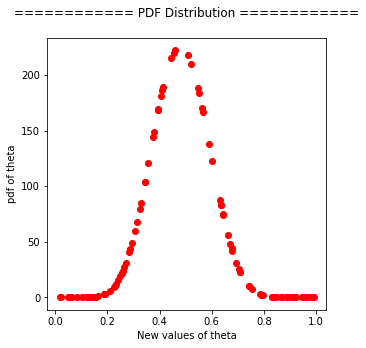

In [ ]:
plt.figure(figsize = (5,5))  
plt.ylabel('pdf of theta')
plt.xlabel('New values of theta')
plt.title('============ PDF Distribution ============\n')
plt.scatter(theta_output, prob_dist_theta, c ="red") 

print('\nPosteriori Distribution Mean:\n{}'.format(np.mean(prob_dist_theta)))
print('\nPosteriori Distribution Standard Deviation:\n{}'.format(np.std(prob_dist_theta)))